In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S2/Office_Amelie-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24, 1)
y_train.shape =  (3576,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [37]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 48)               4992      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [38]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [39]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
28/28 [==============================] - 4s 19ms/step - loss: 401.8216
Epoch 2/300
28/28 [==============================] - 1s 23ms/step - loss: 216.2230
Epoch 3/300
28/28 [==============================] - 1s 20ms/step - loss: 176.9277
Epoch 4/300
28/28 [==============================] - 1s 18ms/step - loss: 120.3342
Epoch 5/300
28/28 [==============================] - 1s 19ms/step - loss: 72.8542
Epoch 6/300
28/28 [==============================] - 1s 18ms/step - loss: 48.8551
Epoch 7/300
28/28 [==============================] - 1s 19ms/step - loss: 36.6691
Epoch 8/300
28/28 [==============================] - 1s 18ms/step - loss: 30.0915
Epoch 9/300
28/28 [==============================] - 1s 19ms/step - loss: 25.9715
Epoch 10/300
28/28 [==============================] - 1s 19ms/step - loss: 23.1925
Epoch 11/300
28/28 [==============================] - 1s 19ms/step - loss: 21.0491
Epoch 12/300
28/28 [==============================] - 1s 22ms/step - loss: 19.7697
Epoch 13/

In [40]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [42]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 3.703365221127304
RMSE for BiLSTM Model for testing is: 16.27984987758595
MAE for BiLSTM Model for training is: 2.217637302363479
MAE for BiLSTM Model for testing is: 10.646716387874777
MAPE for BiLSTM Model for training is: 0.1183491899452394
MAPE for BiLSTM Model for testing is: 0.21336701052028534


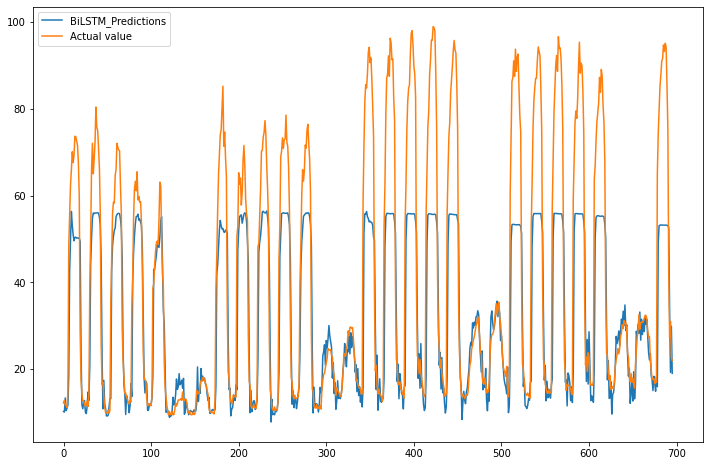

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [31]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([12.21]), array([11.533558], dtype=float32))

In [32]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.67644211]), array([1.43874123]), array([-0.4249847]), array([0.29388351]), array([0.03561752]), array([3.40221558]), array([33.75624695]), array([17.47538055]), array([19.57208252]), array([15.8746051]), array([19.57114227]), array([17.95910629]), array([20.23702057]), array([22.97721115]), array([21.16193848]), array([20.03843521]), array([20.12207916]), array([17.83442902]), array([13.88387344]), array([-10.96214569]), array([-4.00652985]), array([-0.35752575]), array([1.07317539]), array([0.61388489]), array([-1.0110519]), array([-0.28277779]), array([0.4353656]), array([1.24076714]), array([-1.28555355]), array([0.7109412]), array([15.81393814]), array([4.14795654]), array([16.61287842]), array([15.65668396]), array([6.53035187]), array([10.76718872]), array([14.32233032]), array([21.85637512]), array([16.74993271]), array([16.11675903]), array([12.17582748]), array([9.67706329]), array([5.87696625]), array([-13.38609848]), array([-3.25202469]), array([2.82049843]), array

In [33]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([47.94229767]), array([-15.02943817]))

In [34]:
max(d1)-min(d1)

array([62.97173584])

In [35]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [36]:
len(neg),len(pos)

(269, 427)